In [107]:
#Data Cleaning to check if there are any NAN, duplicates or any wrong values.

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import random
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm # What does this do? Cross-sectional models
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing
#from library.sb_utils import save_file

In [191]:
#the supplied CSV data file is the raw_data directory
data=pd.read_csv('/Users/sidrakamal/Desktop/archive/CO2 Emissions_Canada.csv')
#Call the info method on C02_data to see a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [110]:
data.shape

(7385, 12)

In [111]:
#Call the head method on C02_data to print the first several rows of the data
data.head(5)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [112]:
#removing the Fuel Consumption Comb column because it is not needed
data.drop(columns='Fuel Consumption Comb (mpg)',inplace=True)
data.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [113]:
#Removing inconsistent categories from Make, Model, Vehicle Class, Transmission and Fuel Type

In [114]:
# Create a dictionary which will remap the values and replace the abbreviation in Fuel Type

dict = {'Z' : 'Premium gasoline', 'D' : 'Diesel', 'E' : 'Ethanol', 'N' : 'Natural gas','X': 'Regular gasoline'}
  
# Print the dictionary
print(dict)
  
# Remap the values of the dataframe
data=data.replace({"Fuel Type": dict})
data.head(5)


{'Z': 'Premium gasoline', 'D': 'Diesel', 'E': 'Ethanol', 'N': 'Natural gas', 'X': 'Regular gasoline'}


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium gasoline,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium gasoline,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium gasoline,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.1,8.7,10.6,244


In [115]:
s=data['Transmission'].value_counts().sort_values(ascending=False)
s

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

In [116]:
data['Make'] = data['Make'].str.upper()
data['Model'] = data['Model'].str.upper()
data['Vehicle Class'] = data['Vehicle Class'].str.upper()
data['Transmission'] = data['Transmission'].str.upper()
data.tail(5)



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium gasoline,10.7,7.7,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium gasoline,11.2,8.3,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Premium gasoline,11.7,8.6,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Premium gasoline,11.2,8.3,9.9,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Premium gasoline,12.2,8.7,10.7,248


In [117]:
s=data['Transmission']
result=[]
for i in s:
    if i.startswith('A'):
        i='Automatic'
        result.append(i)
    else:
        i='Manual'
        result.append(i)

In [118]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#C02_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

,count,%
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0
Fuel Consumption Comb (L/100 km),0,0.0


In [119]:
data.insert(6, 'Transmission_Type', result)
data.head(5)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Automatic,Premium gasoline,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Manual,Premium gasoline,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Automatic,Premium gasoline,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Automatic,Premium gasoline,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Automatic,Premium gasoline,12.1,8.7,10.6,244


In [120]:
data.nunique()

Make                                  42
Model                               1596
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Transmission_Type                      2
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
CO2 Emissions(g/km)                  331
dtype: int64

In [121]:
data.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Transmission_Type                    object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
CO2 Emissions(g/km)                   int64
dtype: object

In [122]:
#Categorical data
types=data.select_dtypes(include='object')
types

,Make,Model,Vehicle Class,Transmission,Transmission_Type,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Automatic,Premium gasoline
1,ACURA,ILX,COMPACT,M6,Manual,Premium gasoline
2,ACURA,ILX HYBRID,COMPACT,AV7,Automatic,Premium gasoline
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Automatic,Premium gasoline
4,ACURA,RDX AWD,SUV - SMALL,AS6,Automatic,Premium gasoline
...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Automatic,Premium gasoline
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Automatic,Premium gasoline
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Automatic,Premium gasoline
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Automatic,Premium gasoline


In [123]:
data['Model'].tail()

7380    XC40 T5 AWD
7381    XC60 T5 AWD
7382    XC60 T6 AWD
7383    XC90 T5 AWD
7384    XC90 T6 AWD
Name: Model, dtype: object

In [124]:
new_model = data['Model'].unique()
new_model

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'TACOMA 4WD D-CAB TRD OFF-ROAD/PRO', 'ATLAS CROSS SPORT 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [125]:
#To check for the duplicated rows in the dataframe
duplicate=data.duplicated().sum()
duplicate

1394

In [126]:
#removing the duplicate values from the dataframe
df=data.drop_duplicates()
#finding out the rows and columns after the removal of the duplicates
df.shape

(5991, 12)

In [127]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5991.0,3.173043,1.365751,0.9,2.0,3.0,3.8,8.4
Cylinders,5991.0,5.633784,1.851161,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),5991.0,12.650075,3.560977,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),5991.0,9.091320,2.293336,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),5991.0,11.049224,2.957762,4.1,8.9,10.6,12.7,26.1
CO2 Emissions(g/km),5991.0,251.638124,59.246929,96.0,208.0,246.0,290.0,522.0


From this table we can see that an average car consumes more fuel in the City than in the Highway!

In [128]:
df['Make'].value_counts(normalize=True)

FORD             0.093974
CHEVROLET        0.083959
BMW              0.082123
MERCEDES-BENZ    0.060591
GMC              0.046403
AUDI             0.043899
PORSCHE          0.042898
TOYOTA           0.042063
NISSAN           0.032048
JEEP             0.031380
MINI             0.031213
KIA              0.030379
VOLKSWAGEN       0.030045
HYUNDAI          0.028710
DODGE            0.025204
HONDA            0.024036
CADILLAC         0.023535
LEXUS            0.021532
MAZDA            0.020865
VOLVO            0.019696
SUBARU           0.018695
JAGUAR           0.017026
BUICK            0.015189
INFINITI         0.014355
LINCOLN          0.013020
LAND ROVER       0.012185
RAM              0.011851
MITSUBISHI       0.011851
CHRYSLER         0.010349
FIAT             0.009014
ACURA            0.008179
MASERATI         0.008179
ROLLS-ROYCE      0.007344
ASTON MARTIN     0.006510
LAMBORGHINI      0.006176
BENTLEY          0.005842
SCION            0.003505
GENESIS          0.002337
ALFA ROMEO  

In [129]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [130]:
df['Model'].value_counts().sort_values(ascending=False).head()

MUSTANG          33
F-150 FFV        32
F-150 FFV 4X4    31
SIERRA 4WD       27
SILVERADO 4WD    26
Name: Model, dtype: int64

In [131]:
df['Vehicle Class'].value_counts().sort_values(ascending=False).head()

SUV - SMALL       961
MID-SIZE          931
COMPACT           888
SUV - STANDARD    590
SUBCOMPACT        517
Name: Vehicle Class, dtype: int64

In [132]:
df['Engine Size(L)'].value_counts().sort_values(ascending=False).head()

2.0    1212
3.0     641
3.5     409
3.6     403
2.5     338
Name: Engine Size(L), dtype: int64

In [133]:
df['Cylinders'].value_counts().sort_values(ascending=False).head()

4     2612
6     1931
8     1170
12     131
3       80
Name: Cylinders, dtype: int64

In [134]:
df['Transmission'].value_counts().sort_values(ascending=False)

AS6     1103
AS8     1019
M6       724
A6       671
AM7      357
A8       350
AS7      278
A9       250
AV       224
M5       165
AS10     149
AM6       97
AV6       83
AV7       83
A5        72
M7        66
AS9       60
A4        58
AM8       42
A7        42
AV8       33
A10       25
AS5       24
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

In [135]:
df['Fuel Type'].value_counts().sort_values(ascending=False).head()

Regular gasoline    2878
Premium gasoline    2641
Ethanol              325
Diesel               146
Natural gas            1
Name: Fuel Type, dtype: int64

In [136]:
df['Make'].value_counts().sort_values(ascending=False).head()

FORD             563
CHEVROLET        503
BMW              492
MERCEDES-BENZ    363
GMC              278
Name: Make, dtype: int64

In [137]:
df['Transmission_Type'].value_counts()

Automatic    5036
Manual        955
Name: Transmission_Type, dtype: int64

In [138]:
model=df['Make'].value_counts().sort_values(ascending=False).head(5)
model

FORD             563
CHEVROLET        503
BMW              492
MERCEDES-BENZ    363
GMC              278
Name: Make, dtype: int64

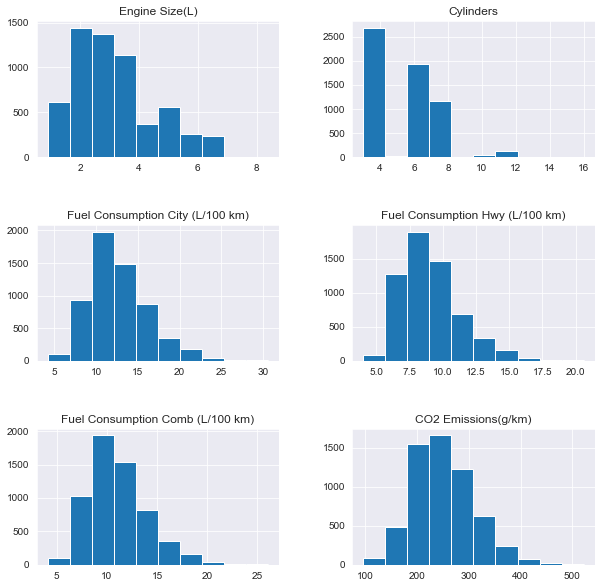

In [139]:
df.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

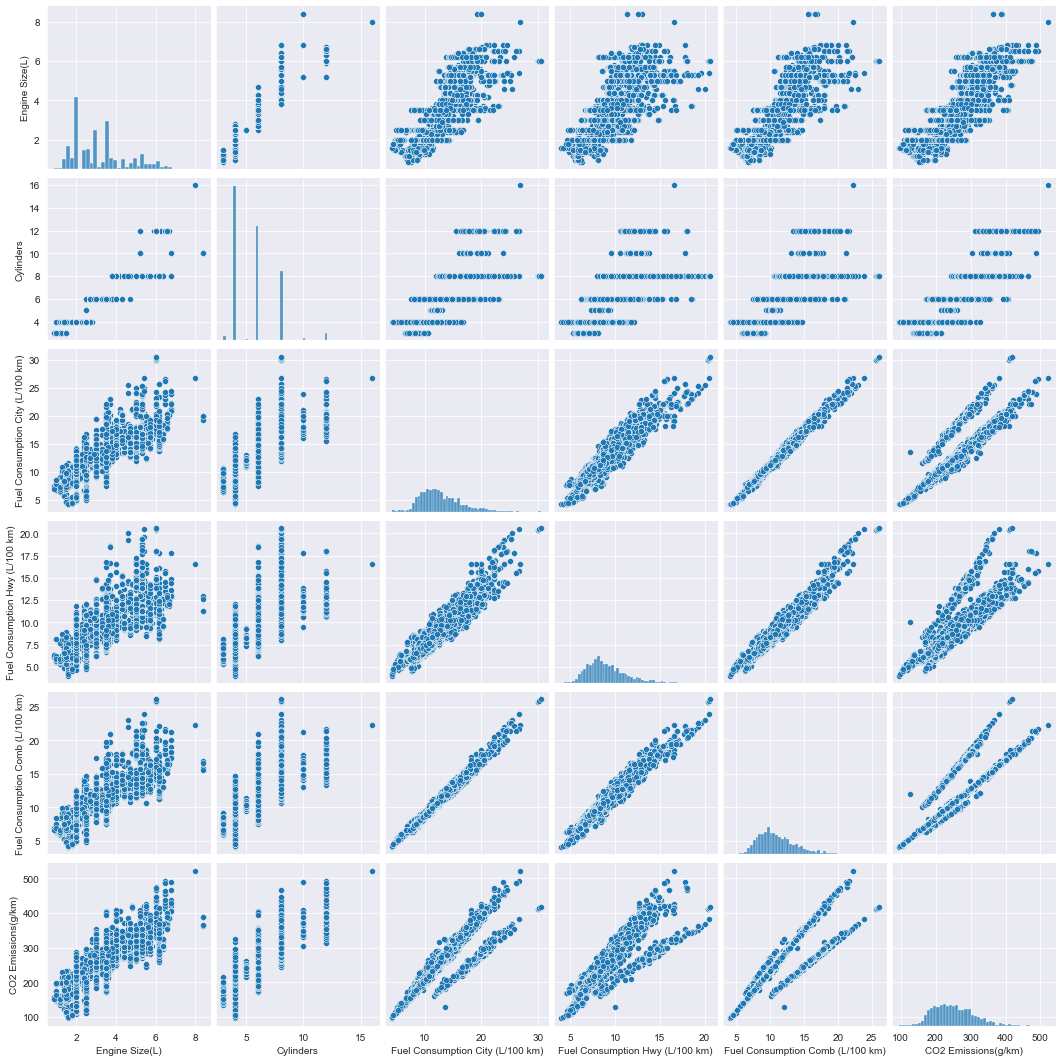

In [140]:
sns.pairplot(df)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

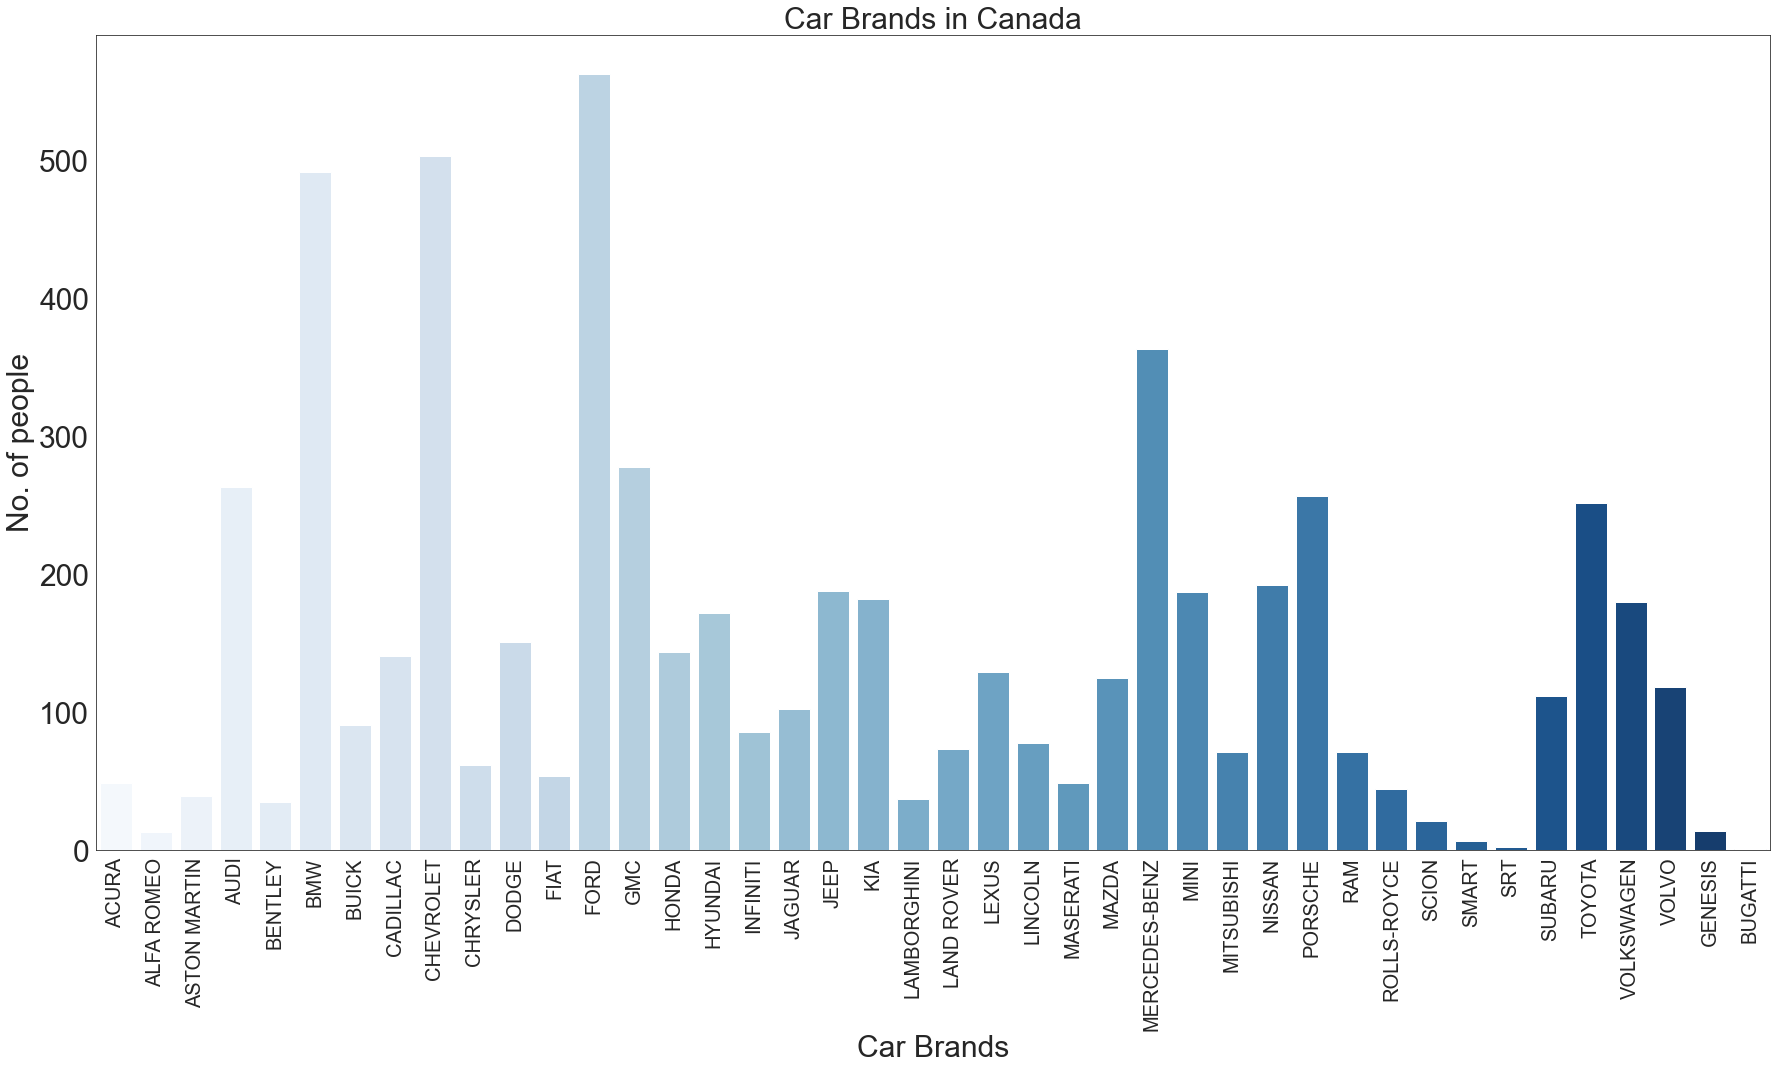

In [181]:
fig, c = plt.subplots(figsize = (30,15))
c = sns.countplot(x = 'Make',data=df,palette='Blues')
c.set_xlabel('Car Brands', fontsize = 30)
c.set_ylabel ('No. of people', fontsize = 30)
c.set_title('Car Brands in Canada',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=30)

From this bar graph, Ford is the most popular choice in Canada.

In [142]:
most_fuel_means = df.groupby(['Make','Model'])[['CO2 Emissions(g/km)']].mean()
CO2_emissions=most_fuel_means.sort_values(by='CO2 Emissions(g/km)', ascending=False).head(5)
CO2_emissions

CO2 Emissions(g/km)
Make          Model                                         
BUGATTI       CHIRON                                   522.0
FORD          E350 WAGON                               488.0
MERCEDES-BENZ AMG G 65                                 472.0
LAMBORGHINI   AVENTADOR S ROADSTER                     464.0
              AVENTADOR ROADSTER LP 740                461.0

From this table, car company 'BUGATI' and model CHIRON has the highest fuel consumption in the city with an average of 26.8 L/100 km.

In [143]:
#Looking at Ford Models specifically since it is the most popular company for cars used in Canada
#Which Ford Model consumes the most fuel and is also producing the highest CO2 emissions?
ford=df[df.Make == 'FORD']
ford.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
351,FORD,E350 WAGON FFV,VAN - PASSENGER,5.4,8,A4,Automatic,Ethanol,26.7,20.5,23.9,382
348,FORD,E150 WAGON FFV,VAN - PASSENGER,4.6,8,A4,Automatic,Ethanol,25.5,20.0,23.0,368
346,FORD,E150 VAN FFV,VAN - CARGO,5.4,8,A4,Automatic,Ethanol,24.9,19.6,22.5,360
362,FORD,EXPEDITION 4X4 FFV,SUV - STANDARD,5.4,8,A6,Automatic,Ethanol,24.5,18.0,21.6,346
344,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,Automatic,Ethanol,24.1,19.2,21.9,350


From this table, Ford Model "E350 WAGON FFV" consumes the most fuel in the city with an average fuel consumption of 26.7(L/100 km)

In [144]:
df_ford_model=ford["Model"].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'}).head(10)
df_ford_model



,Model,Count
0,MUSTANG,33
1,F-150 FFV,32
2,F-150 FFV 4X4,31
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,EDGE AWD,17
7,MUSTANG CONVERTIBLE,17
8,FUSION,15
9,ESCAPE AWD,12


Most popular Ford Model is Mustang in Canada

In [145]:
grouped_df = df.groupby(['Make']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max', 'median']})
grouped_df.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max', 'CO2 Emissions_median']
grouped_df = grouped_df.reset_index()
grouped_df.head(5)

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median
0,ACURA,222.428571,136,267,228.0
1,ALFA ROMEO,236.384615,193,292,218.0
2,ASTON MARTIN,344.282051,264,450,345.0
3,AUDI,252.676806,177,409,242.0
4,BENTLEY,367.914286,291,465,373.0


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

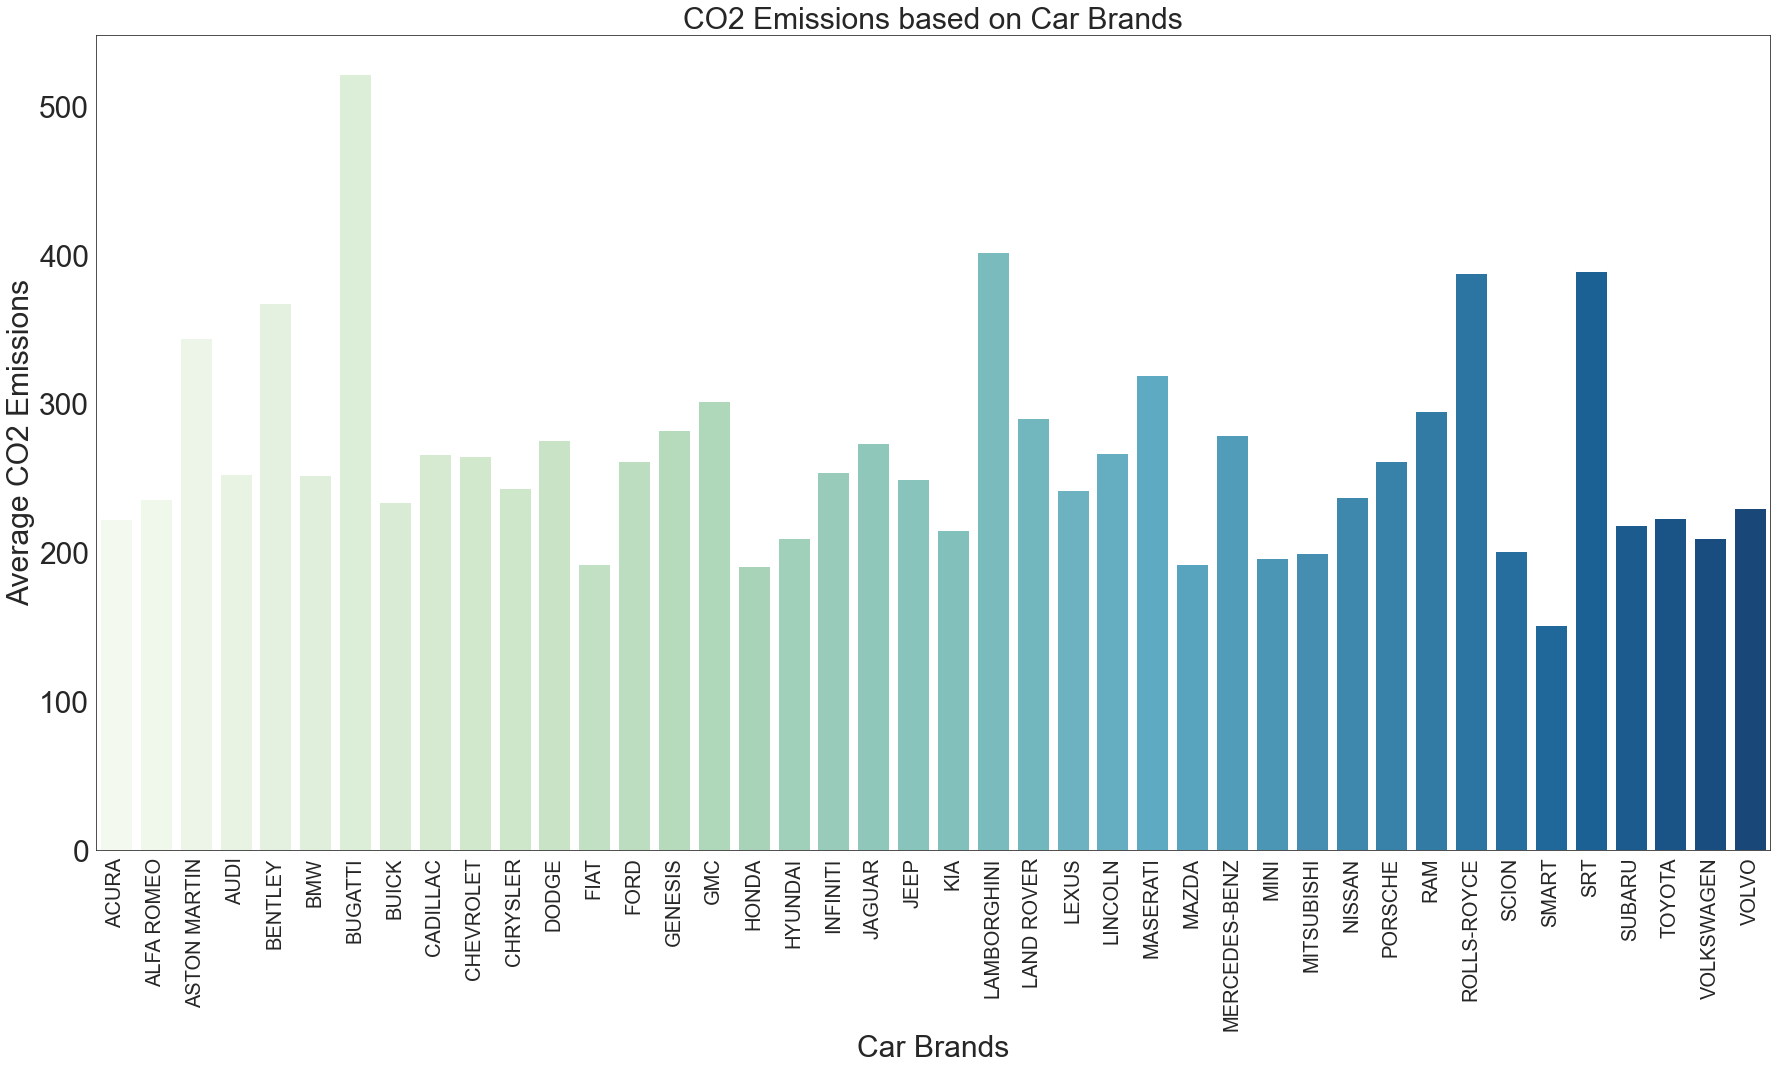

In [179]:
fig, c = plt.subplots(figsize = (30,15))
c = sns.barplot(x = 'Make',y='CO2 Emissions(g/km)_mean',data=grouped_df, palette="GnBu" )
c.set_xlabel('Car Brands', fontsize = 30)
c.set_ylabel ('Average CO2 Emissions', fontsize = 30)
c.set_title('CO2 Emissions based on Car Brands',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=30)

In [147]:
grouped = df.groupby(['Make']).agg({'Make':'count'})
grouped.rename(columns = {'Make':'Number_vehicles'},inplace=True)
grouped= grouped.reset_index(level=0)
merged=pd.merge(grouped_df, grouped)
merged['Total_CO2_Emissions']=merged['CO2 Emissions(g/km)_mean']*merged['Number_vehicles']
merged.head(10)
#merged.sort_values(by='Total_CO2_Emissions',ascending=False).head(10)
merged1=merged.sort_values(by='CO2 Emissions(g/km)_mean', ascending=False).head(5)
merged1

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median,Number_vehicles,Total_CO2_Emissions
6,BUGATTI,522.000000,522,522,522.0,1,522.0
22,LAMBORGHINI,402.270270,331,493,384.0,37,14884.0
37,SRT,389.000000,389,389,389.0,2,778.0
34,ROLLS-ROYCE,388.204545,359,404,391.5,44,17081.0
4,BENTLEY,367.914286,291,465,373.0,35,12877.0


In [148]:
grouped_df_class = df.groupby('Vehicle Class').agg({'CO2 Emissions(g/km)': ['mean', 'count']})
grouped_df_class.columns = ['CO2 Emissions(g/km)_mean', 'Number of Vehicles']
grouped_df_class=grouped_df_class.reset_index()
#grouped_df_class = grouped_df_class.drop(labels=369, axis=0)#deleting the lowercase repeated data for BUGATTI make
grouped_df_class=grouped_df_class.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False)
grouped_df_class.head(5)


,Vehicle Class,CO2 Emissions(g/km)_mean,Number of Vehicles
15,VAN - PASSENGER,397.212121,66
14,VAN - CARGO,361.500000,22
12,SUV - STANDARD,306.561017,590
6,PICKUP TRUCK - STANDARD,301.238298,470
13,TWO-SEATER,284.127841,352


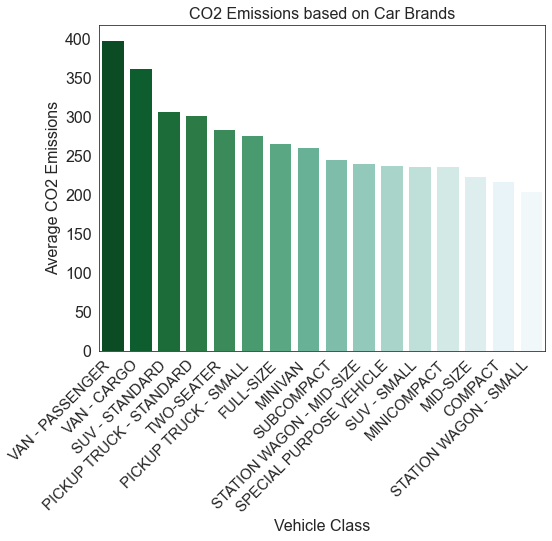

In [180]:
fig, c = plt.subplots(figsize = (8,6))
c = sns.barplot(x = 'Vehicle Class',y='CO2 Emissions(g/km)_mean',data=grouped_df_class,palette="BuGn_r")
c.set_xlabel('Vehicle Class', fontsize = 16)
c.set_ylabel ('Average CO2 Emissions', fontsize = 16)
c.set_title('CO2 Emissions based on Car Brands',fontsize=16)
plt.xticks(rotation=45,fontsize=15,ha='right')
plt.yticks(fontsize=16)
plt.show()

In [150]:
most=merged[merged['Number_vehicles']>200]
most=most.sort_values(by='CO2 Emissions(g/km)_mean', ascending=False)
most.head(5)

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median,Number_vehicles,Total_CO2_Emissions
15,GMC,301.910072,198,465,299.0,278,83931.0
28,MERCEDES-BENZ,278.823691,128,476,274.0,363,101213.0
9,CHEVROLET,264.669980,121,465,273.0,503,133129.0
13,FORD,261.591474,126,488,264.0,563,147276.0
32,PORSCHE,261.482490,212,358,255.0,257,67201.0


In [151]:
grouped_df_engine = df.groupby(['Engine Size(L)','Cylinders']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max']})
grouped_df_engine.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max']
grouped_df_engine=grouped_df_engine.reset_index()
grouped_df_engine.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(5)

,Engine Size(L),Cylinders,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max
63,8.0,16,522.000000,522,522
62,6.8,10,488.000000,488,488
58,6.5,12,451.176471,412,493
53,6.0,8,428.517241,327,465
61,6.8,8,424.428571,405,465


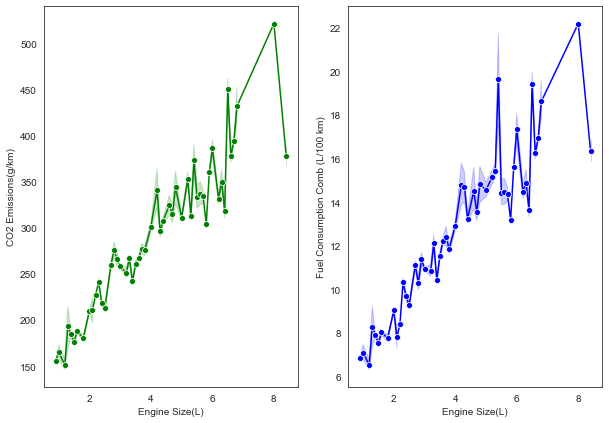

In [208]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.set_style('white')
p=sns.lineplot(x='Engine Size(L)',y='CO2 Emissions(g/km)',data=df,color='g',marker='o')

plt.subplot(1,2,2)
sns.set_style('white')
p=sns.lineplot(x='Engine Size(L)',y='Fuel Consumption Comb (L/100 km)',data=df,color='b',marker='o')


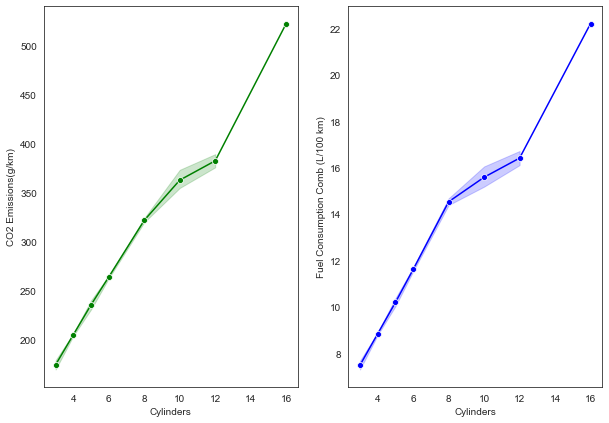

In [209]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.set_style('white')
p=sns.lineplot(x='Cylinders',y='CO2 Emissions(g/km)',data=df,color='g',marker='o')

plt.subplot(1,2,2)
sns.set_style('white')
p=sns.lineplot(x='Cylinders',y='Fuel Consumption Comb (L/100 km)',data=df,color='b',marker='o')

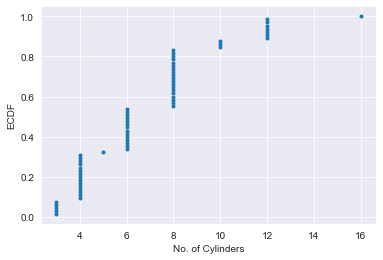

In [154]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y
sns.set_style('darkgrid')
x,y=ecdf(grouped_df_engine['Cylinders'])
plt.xlabel('No. of Cylinders')
plt.ylabel('ECDF')
_=plt.plot(x,y,marker='.',linestyle='none')

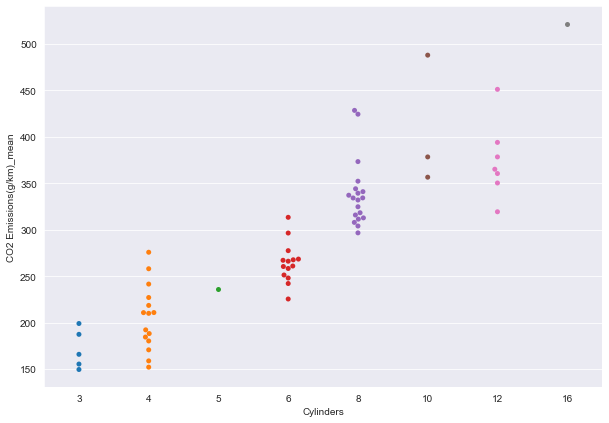

In [210]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')

_=sns.swarmplot(data=grouped_df_engine, x='Cylinders', y='CO2 Emissions(g/km)_mean')
plt.show()

In [156]:
grouped_df_cylinder = df.groupby(['Cylinders']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max']})
grouped_df_cylinder.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max']
grouped_df_cylinder=grouped_df_cylinder.reset_index()
grouped_df_cylinder.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(5)

,Cylinders,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max
7,16,522.000000,522,522
6,12,382.290076,312,493
5,10,362.600000,304,488
4,8,321.711966,244,465
3,6,264.091662,172,406


In [157]:
grouped_df_fuel = df.groupby(['Fuel Type']).agg({'CO2 Emissions(g/km)': ['sum','count','mean','median']})
grouped_df_fuel.columns = ['CO2 Emissions_sum', 'Total Number of Vehicles','C02 Emissions Mean','C02 Emissions Median']
grouped_df_fuel=grouped_df_fuel.reset_index().sort_values(by='C02 Emissions Median',ascending=False)
grouped_df_fuel.head(10)

,Fuel Type,CO2 Emissions_sum,Total Number of Vehicles,C02 Emissions Mean,C02 Emissions Median
1,Ethanol,89798,325,276.301538,280.0
3,Premium gasoline,702901,2641,266.149565,255.0
0,Diesel,34402,146,235.630137,243.5
4,Regular gasoline,680250,2878,236.362057,229.0
2,Natural gas,213,1,213.000000,213.0


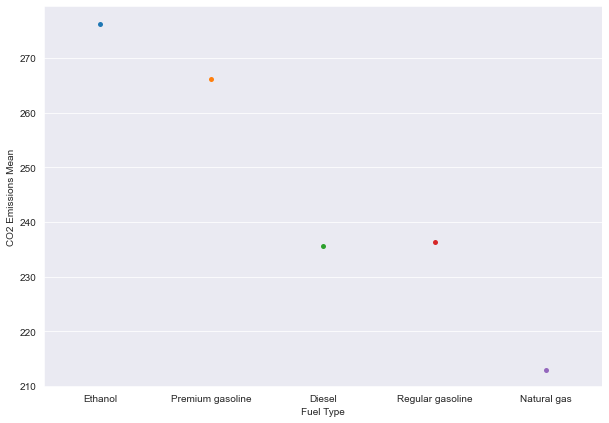

In [211]:
plt.figure(figsize=(10,7))
_=sns.swarmplot(x='Fuel Type',y='C02 Emissions Mean',data=grouped_df_fuel)
_=plt.xlabel('Fuel Type')
_=plt.ylabel('CO2 Emissions Mean')
plt.show()

<Figure size 720x504 with 0 Axes>

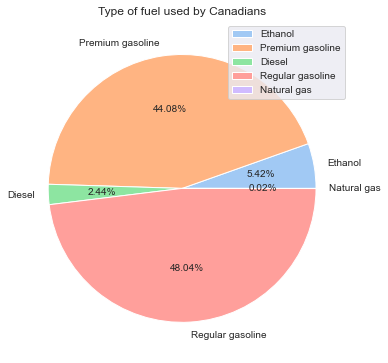

In [212]:
plt.figure(figsize=(10,7))
data = grouped_df_fuel.iloc[:,2]
labels = grouped_df_fuel.iloc[:,0]
plt.figure(figsize=(6,8))
colors = sns.color_palette('pastel')
plt.pie(data, labels = labels, colors = colors, autopct='%0.2f%%')
plt.title('Type of fuel used by Canadians')
first_legend = plt.legend(labels,loc = 1)
plt.show()

From this pie chart, 48.04% of Canadians use Regular gasoline.

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Density'>

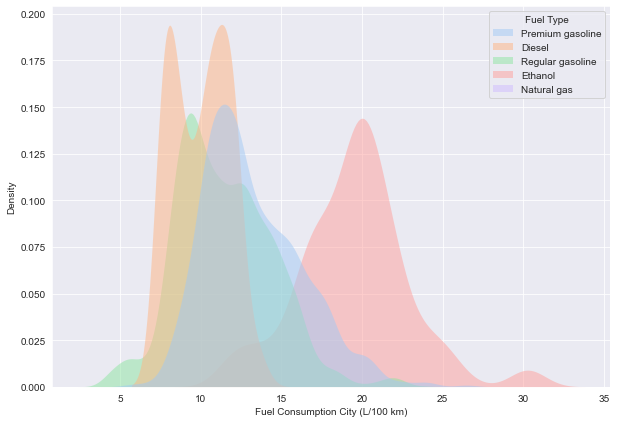

In [213]:
plt.figure(figsize=(10,7))
x=df.iloc[:,8]
sns.kdeplot(palette='pastel',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)



/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



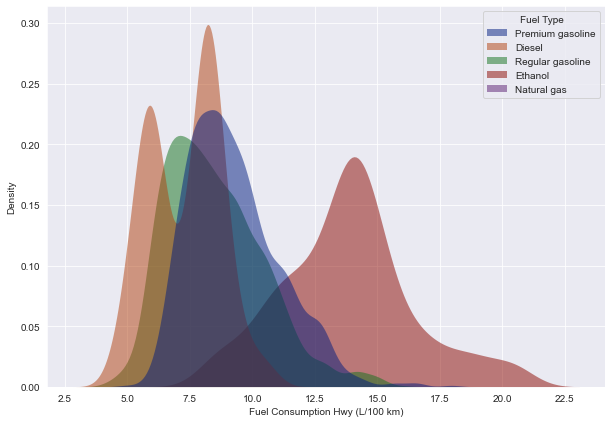

In [214]:
plt.figure(figsize=(10,7))
x=df.iloc[:,9]
g=sns.kdeplot(palette='dark',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)
plt.show(g)

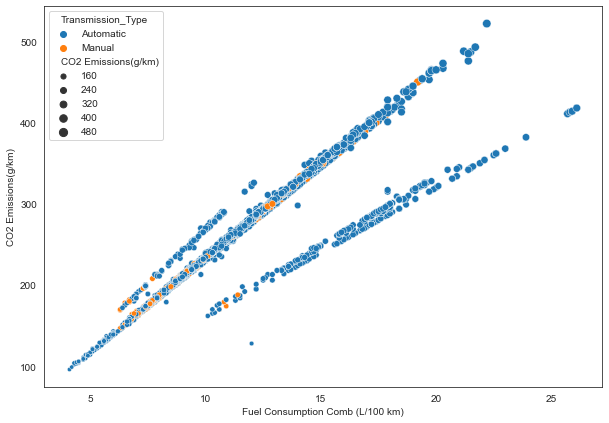

In [162]:
plt.figure(figsize=(10,7))
sns.set_style('white')
sns.scatterplot(x="Fuel Consumption Comb (L/100 km)",
            y="CO2 Emissions(g/km)", data=df,
            hue="Transmission_Type",
            size='CO2 Emissions(g/km)')
plt.show()

In [169]:
plt.figure(figsize=(4,2))
fig = px.scatter(df, x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", color='Transmission_Type', size='CO2 Emissions(g/km)')
fig.show()

<Figure size 288x144 with 0 Axes>

In [170]:
fig = px.scatter(df, x="Engine Size(L)", y="Fuel Consumption Comb (L/100 km)",
                 color="Fuel Type",
                 size='CO2 Emissions(g/km)')
  
fig.show()

From these two Kernel Density Estimate, Fuel Consumption in City is more than Fuel Consumption in the Highway.

<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='CO2 Emissions(g/km)'>

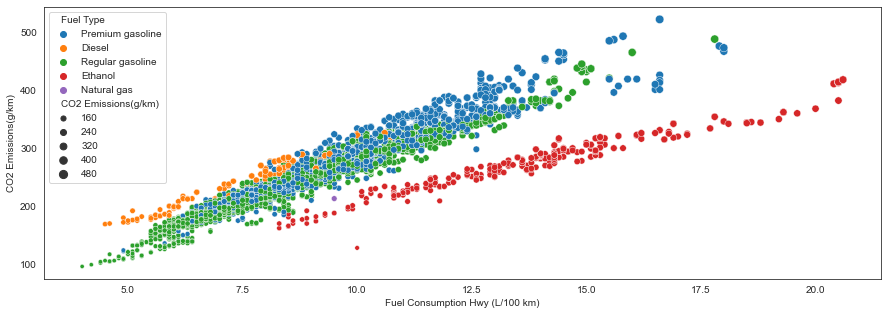

In [165]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption Hwy (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

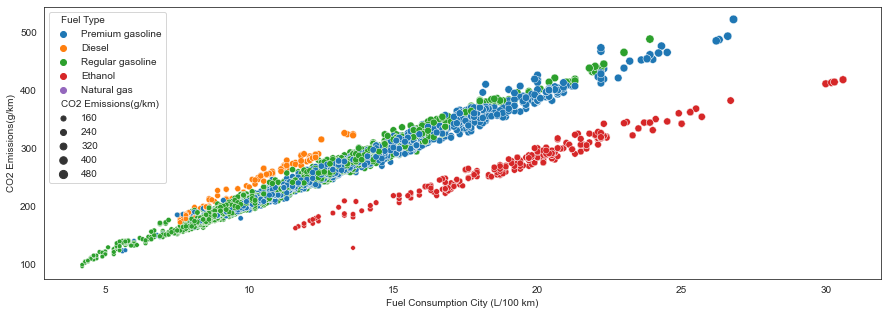

In [166]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption City (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

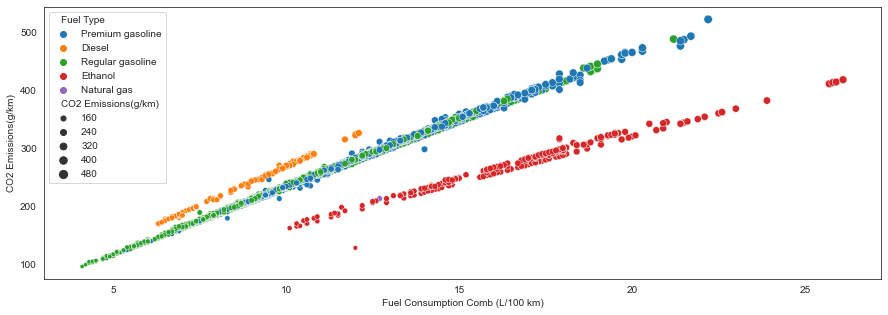

In [172]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption Comb (L/100 km)'>

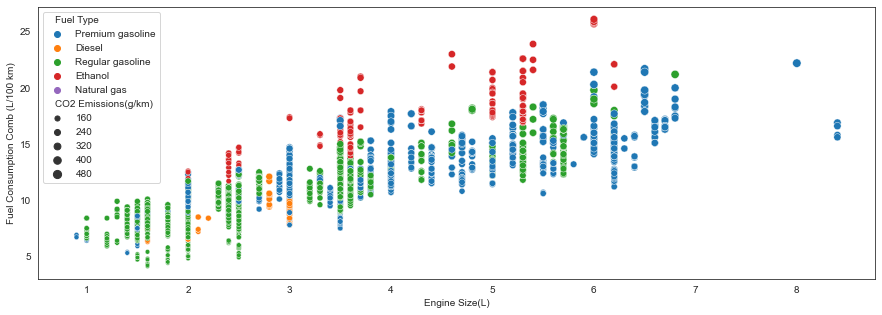

In [173]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Engine Size(L)',y='Fuel Consumption Comb (L/100 km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

In [174]:
df[df['Fuel Type']=='Ethanol'].head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
145,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,Automatic,Ethanol,18.4,12.2,15.6,250
147,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,Automatic,Ethanol,19.4,13.0,16.5,264
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,Automatic,Ethanol,23.3,16.1,20.1,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,Automatic,Ethanol,25.7,17.8,22.1,354
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,Automatic,Ethanol,18.8,13.1,16.2,259


In [175]:
df[df['Fuel Type']=='Regular gasoline'].head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
140,BUICK,ENCLAVE,SUV - STANDARD,3.6,6,A6,Automatic,Regular gasoline,14.3,9.9,12.3,283
141,BUICK,ENCLAVE AWD,SUV - STANDARD,3.6,6,A6,Automatic,Regular gasoline,14.6,10.2,12.6,290
142,BUICK,ENCORE,SUV - SMALL,1.4,4,AS6,Automatic,Regular gasoline,9.5,7.2,8.5,196
143,BUICK,ENCORE AWD,SUV - SMALL,1.4,4,AS6,Automatic,Regular gasoline,10.2,8.0,9.2,212
144,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,Automatic,Regular gasoline,13.7,8.7,11.5,264


In [176]:
grouped_df_Cylinders_Fuel = df.groupby(['Cylinders','Fuel Type']).agg({'CO2 Emissions(g/km)': ['sum','count','mean','median']})
grouped_df_Cylinders_Fuel.columns = ['CO2 Emissions_sum', 'Total Number of Vehicles','C02 Emissions Mean','C02 Emissions Median']
grouped_df_Cylinders_Fuel=grouped_df_Cylinders_Fuel.reset_index()
grouped_df_Cylinders_Fuel
#grouped_df_Cylinders_Fuel=grouped_df_Cylinders.reset_index()
#grouped_df_Cylinders_Fuel

,Cylinders,Fuel Type,CO2 Emissions_sum,Total Number of Vehicles,C02 Emissions Mean,C02 Emissions Median
0,3,Premium gasoline,8922,49,182.081633,181.0
1,3,Regular gasoline,5047,31,162.806452,155.0
2,4,Diesel,16663,78,213.628205,198.0
3,4,Ethanol,10359,51,203.117647,208.0
4,4,Premium gasoline,175557,815,215.407362,214.0
5,4,Regular gasoline,333418,1668,199.890887,198.0
6,5,Premium gasoline,1465,6,244.166667,244.0
7,5,Regular gasoline,4663,20,233.150000,232.0
8,6,Diesel,17739,68,260.867647,264.5
9,6,Ethanol,34260,130,263.538462,263.0


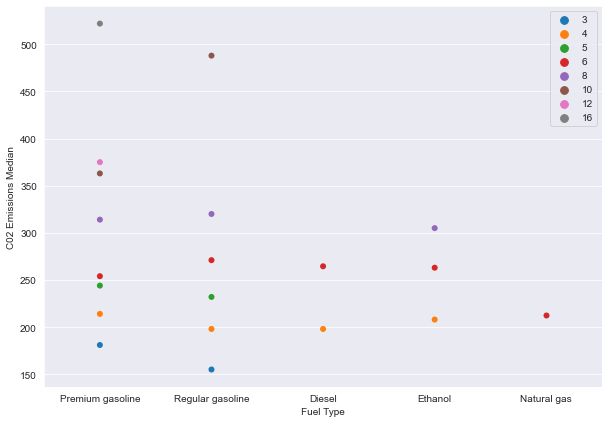

In [215]:
plt.figure(figsize=(10,7))
_=sns.swarmplot(x='Fuel Type',y='C02 Emissions Median',data=grouped_df_Cylinders_Fuel,hue='Cylinders',size=6)
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:>

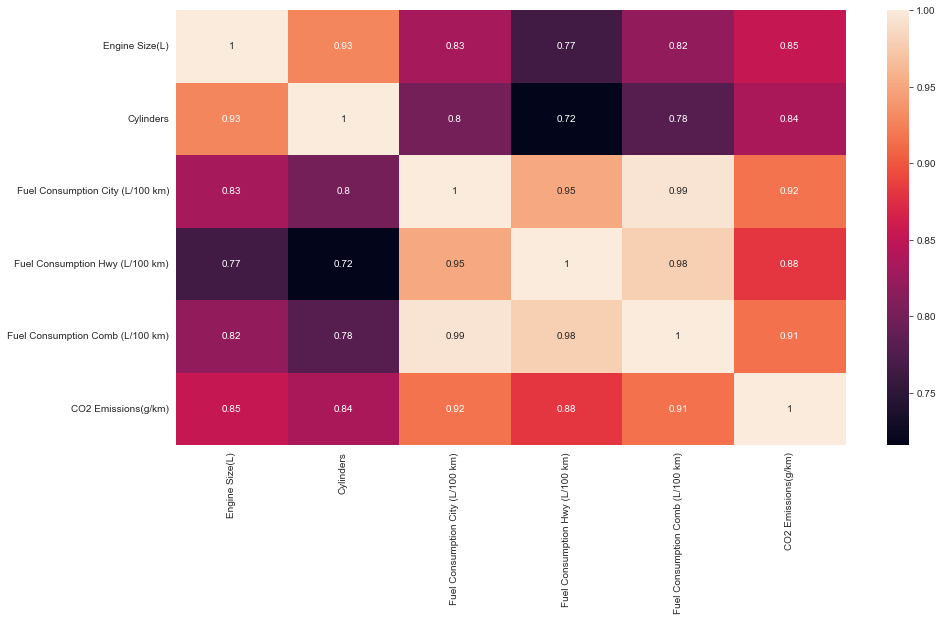

In [186]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)

Linear Regression Model

In [188]:
X = df[["Engine Size(L)"]] 
y = df[["CO2 Emissions(g/km)"]]

In [192]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=123)

In [193]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4493, 1) (4493, 1)
(1498, 1) (1498, 1)


In [194]:
rModel = linear_model.LinearRegression(normalize=True)

In [195]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [202]:
print(rModel.score(X_train, y_train))

0.7277470859276419


In [203]:
y_pred = rModel.predict(X_test)
y_pred

array([[200.78514893],
       [319.3211405 ],
       [263.75739445],
       ...,
       [297.09564208],
       [245.23614577],
       [256.34889498]])

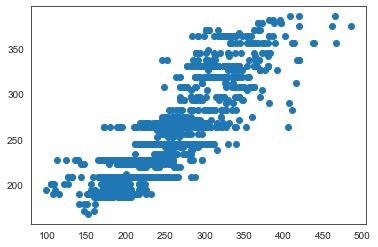

In [204]:
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

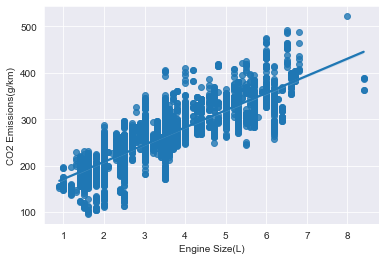

In [216]:
sns.regplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)

3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [219]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X = df[["Engine Size(L)"]] 
y = df[["CO2 Emissions(g/km)"]]
# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
X = sm.add_constant(X)

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [220]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=123)

In [221]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [222]:
# Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.728
Model:                             OLS   Adj. R-squared:                  0.728
Method:                  Least Squares   F-statistic:                 1.200e+04
Date:                 Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                         22:01:46   Log-Likelihood:                -21790.
No. Observations:                 4493   AIC:                         4.358e+04
Df Residuals:                     4491   BIC:                         4.360e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            134.1087      1.165    115.115      0.000     131.825     136.393
Engine Size(L)    37.0425      0.338    109.566      0.000      36.380      37.705
==============================================================================
Omnibus:                      139.359   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.916
Skew:                           0.114   Prob(JB):                     5.67e-75
Kurtosis:                       4.332   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)

Text(0.5, 1.0, 'Correlation of test vs actual using Model 2: Ordinary Least Squares')

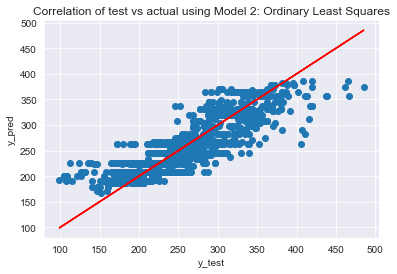

In [225]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot(y_test,y_test, color='red')

# Label it nicely
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Correlation of test vs actual using Model 2: Ordinary Least Squares')

3d. Making a Linear Regression model: our third model: multiple linear regression

In [226]:
df.head(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Automatic,Premium gasoline,9.9,6.7,8.5,196


In [228]:
X = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)']]

In [229]:
X = sm.add_constant(X)
y = df[["CO2 Emissions(g/km)"]]

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [238]:
rModel3 = sm.OLS(y_train, X_train)

# Fit the model
rModel3_results = rModel3.fit()

In [239]:
# Evaluate the model
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.877
Model:                             OLS   Adj. R-squared:                  0.876
Method:                  Least Squares   F-statistic:                 1.063e+04
Date:                 Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                         22:47:41   Log-Likelihood:                -20013.
No. Observations:                 4493   AIC:                         4.003e+04
Df Residuals:                     4489   BIC:                         4.006e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               52.4299      1.428     36.718      0.000      49.630      55.229
Engine Size(L)                       5.5963      0.674      8.309      0.000       4.276       6.917
Cylinders                            6.7010      0.455     14.716      0.000       5.808       7.594
Fuel Consumption Comb (L/100 km)    13.0102      0.185     70.434      0.000      12.648      13.372
==============================================================================
Omnibus:                     1212.497   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4120.559
Skew:                          -1.339   Prob(JB):                         0.00
Kurtosis:                       6.853   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
# Use our new model to make predictions
y_pred = rModel3_results.predict(X_test)

Text(0.5, 1.0, 'Correlation of test vs actual using Model 3: Multiple Linear Regression')

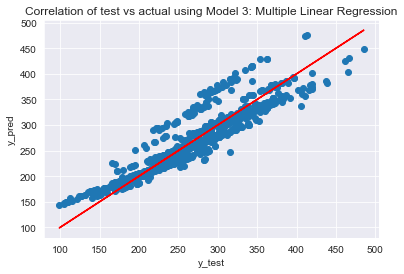

In [242]:

# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot(y_test,y_test, color='red')

# Label it nicely
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Correlation of test vs actual using Model 3: Multiple Linear Regression')

In [246]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
def find_RMSE (pred, actual):
    RMSE = np.sqrt(((pred-actual).mean())**2)
    return RMSE

In [247]:
# Get predictions from rModel3
y_pred = rModel3_results.predict(X_test)

# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(y_test)
matches.rename(columns = {'CO2 Emissions(g/km)':'actual'}, inplace=True)
matches["predicted"] = y_pred
matches.head()


find_RMSE(matches["actual"], matches["predicted"])

0.2121046448700867